In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV

from xgboost import XGBClassifier, plot_importance

import pickle

In [33]:
airline_data = pd.read_csv('../datasets/Invistico_Airline.csv')
airline_data.head()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0


In [34]:
airline_data.dtypes

satisfaction                          object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
dtype: obj

In [35]:
airline_data_dummies = pd.get_dummies(airline_data,
                                         columns=['satisfaction','Customer Type','Type of Travel','Class'])

In [36]:
airline_data_dummies.dtypes

Age                                    int64
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
satisfaction_dissatisfied               bool
satisfaction_satisfied                  bool
Customer Type_Loyal Customer            bool
Customer Type_disloyal Customer         bool
Type of Tr

In [37]:
y = airline_data_dummies['satisfaction_satisfied']
X = airline_data_dummies.drop(['satisfaction_satisfied','satisfaction_dissatisfied'], axis = 1)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [39]:
xgb = XGBClassifier(random_state=42, objective='binary:logistic')

In [40]:
cv_params = {
    'max_depth': [4,5],
    'min_child_weight': [3],
    'learning_rate': [0.1],
    'n_estimators': [5],
    'subsample': [0.7],
    'colsample_bytree': [0.7]
}

In [41]:
scoring = ["accuracy", "f1", "recall", "precision"]

In [42]:
xgb_cv = GridSearchCV(xgb, param_grid=cv_params, scoring=scoring, refit='f1', n_jobs=-1, cv=5)

In [47]:
%%time
xgb_cv.fit(X_train, y_train)

CPU times: user 386 ms, sys: 124 ms, total: 510 ms
Wall time: 1.48 s


,estimator,"XGBClassifier...ree=None, ...)"
,param_grid,"{'colsample_bytree': [0.7], 'learning_rate': [0.1], 'max_depth': [4, 5], 'min_child_weight': [3], ...}"
,scoring,"['accuracy', 'f1', ...]"
,n_jobs,-1
,refit,'f1'
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'binary:logistic'


In [44]:
path = "../models/"
with open(path + 'xgb_cv_model-2.pickle', 'wb') as to_write:
    pickle.dump(xgb_cv, to_write)

In [45]:
with open(path+'xgb_cv_model-2.pickle', 'rb') as to_read:
    xgb_cv = pickle.load(to_read)

In [48]:
y_pred = xgb_cv.predict(X_test)

In [49]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("F1:", f1)
print("Recall:", recall)
print("Precision:", precision)

Accuracy: 0.8920234062211272
F1: 0.9057425529626841
Recall: 0.943063486731609
Precision: 0.8712630598944864


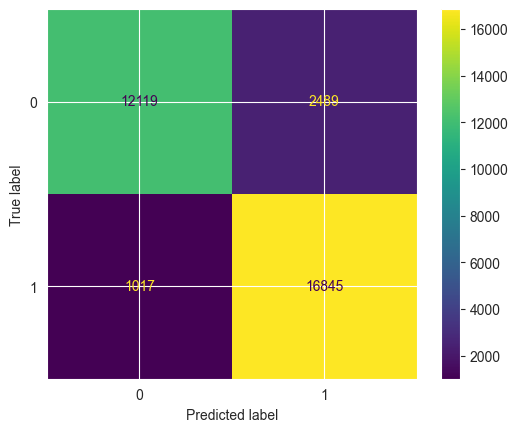

In [51]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_cv.classes_)

disp.plot();

<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

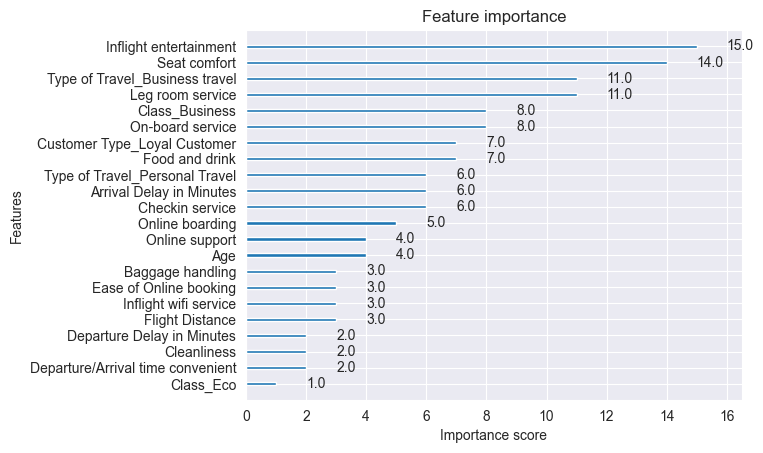

In [54]:
plot_importance(xgb_cv.best_estimator_)